In [1]:
#Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Making the data
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

### Scaling (Preprocessing)

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [3]:
#Importing for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
X_C2_Scaled = scaler.fit_transform(X_C2)

### Classification

In [5]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_C2_Scaled, y_C2, random_state=0)

In [6]:
#Defining the model
knn = KNeighborsClassifier(n_neighbors=1)
#Fitting the model
knn.fit(X_train,y_train)
#Predicting
knn.predict(X_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0])

In [7]:
#Score
knn.score(X_test, y_test)

0.8

### Getting most suitable value of K

In [8]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [9]:
#conversion of array -> dataframe
curve = pd.DataFrame(error_rate)

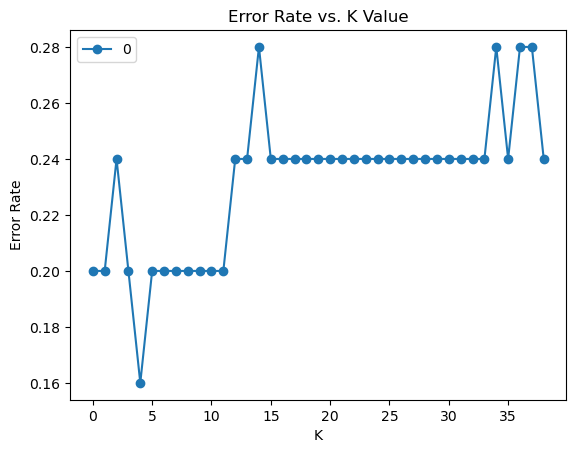

In [10]:
#Plotting the curve 
curve.plot(marker="o")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [11]:
#Defining the model
knn = KNeighborsClassifier(n_neighbors=5)
#Fitting the model
knn.fit(X_train,y_train)
#Predicting
knn.score(X_test, y_test)

0.84

### Regression

In [12]:
#Import for data
from sklearn.datasets import make_regression

In [13]:
#Making the data
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

In [14]:
#Scaling the data
X_R1_Scaled = scaler.fit_transform(X_R1)

In [15]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_R1_Scaled, y_R1, random_state=0)

In [16]:
#Defining the model
knn = KNeighborsRegressor(n_neighbors=5)
#Fitting the model
knn.fit(X_train,y_train)
#Predicting
knn.predict(X_test)

array([231.70974697, 148.35572605, 150.58852659, 150.58852659,
        72.14859259, 166.50590948, 141.90634426, 235.57098756,
       208.25897836, 102.10462746, 191.31852674, 134.50044902,
       228.32181403, 148.35572605, 159.16911306, 113.46875166,
       144.03646012, 199.23189853, 143.19242433, 166.50590948,
       231.70974697, 208.25897836, 128.01545355, 123.14247619,
       141.90634426])

In [17]:
#Score
knn.score(X_test, y_test)

0.4246800858234563